In [2]:
#importing libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#loading data
train1= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train1.shape

(891, 12)

In [10]:
train1.ndim

2

<AxesSubplot:xlabel='Survived', ylabel='count'>

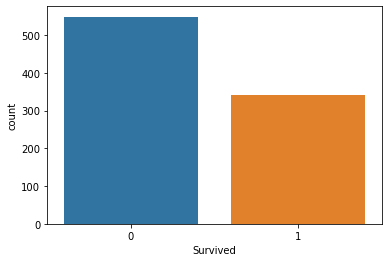

In [18]:
sns.countplot(train1.Survived)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

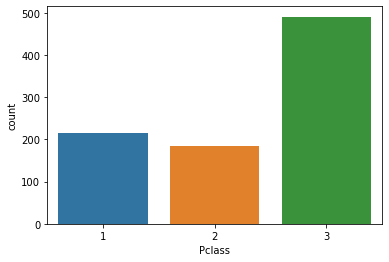

In [20]:
sns.countplot(train1.Pclass)

<AxesSubplot:xlabel='Sex', ylabel='count'>

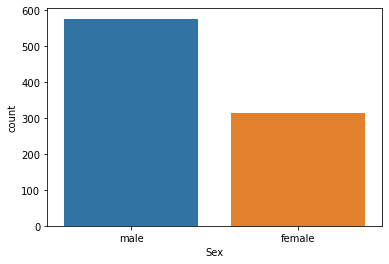

In [21]:
sns.countplot(train1.Sex)

<AxesSubplot:xlabel='Age', ylabel='count'>

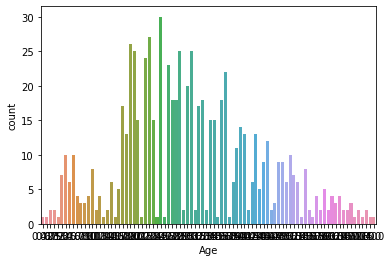

In [22]:
sns.countplot(train1.Age)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

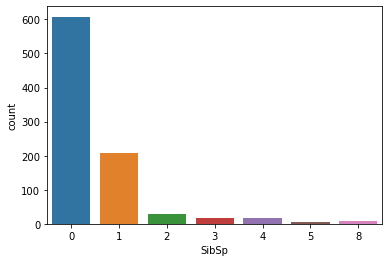

In [23]:
sns.countplot(train1.SibSp)

<AxesSubplot:xlabel='Parch', ylabel='count'>

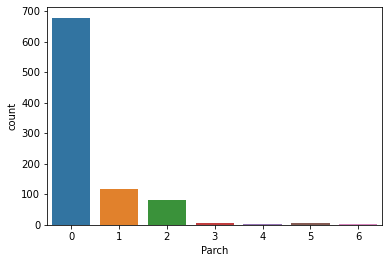

In [24]:
sns.countplot(train1.Parch)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

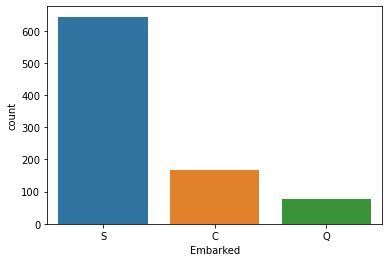

In [29]:
sns.countplot(train1.Embarked)

<AxesSubplot:xlabel='Survived', ylabel='count'>

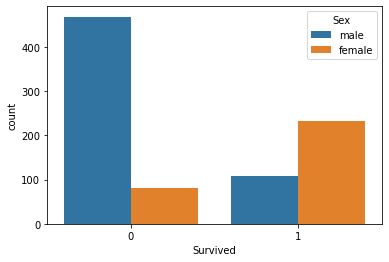

In [30]:
sns.countplot(train1.Survived, hue=train1.Sex)

<AxesSubplot:xlabel='Survived', ylabel='count'>

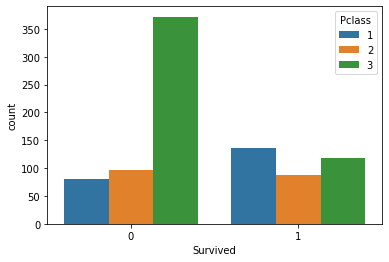

In [31]:
sns.countplot(train1.Survived, hue=train1.Pclass)

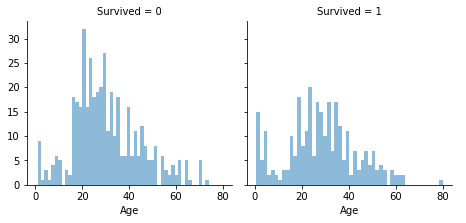

In [49]:
grid = sns.FacetGrid(train1,col='Survived',size=3.2)
grid.map(plt.hist,'Age',alpha=0.5,bins=50)
grid.add_legend()

In [60]:
#missing data in training data
null= train1.isna().sum()
null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
per_null= train1.isna().sum()/train1.isna().count()*100
per_null= round(per_null,1)
per_null

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

In [62]:
missing_data = pd.concat([
    null,
    per_null],
    axis= 1,
    keys= ['number of missing values','% of missing values']
)
missing_data

,number of missing values,% of missing values
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,19.9
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [65]:
# missing data in test data 
null_test = test.isna().sum()
null_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
per_null_test = null_test/test.isna().count()*100
per_null_test = round(per_null_test,1)
per_null_test

PassengerId     0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.6
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.2
Cabin          78.2
Embarked        0.0
dtype: float64

In [69]:
missing_trst_data= pd.concat(
    [null_test,per_null_test],
    axis= 1,
    keys= ['number of missing values', '% of missing values']
)
missing_trst_data

,number of missing values,% of missing values
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,86,20.6
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,1,0.2
Cabin,327,78.2


In [71]:
train1.Embarked

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
30     C
31     C
32     Q
33     S
34     C
35     S
36     C
37     S
38     S
39     C
40     S
41     S
42     C
43     C
44     Q
45     S
46     Q
47     Q
48     C
49     S
50     S
51     S
52     C
53     S
54     C
55     S
56     S
57     C
58     S
59     S
60     C
61     S
62     S
63     S
64     C
65     C
66     S
67     S
68     S
69     S
70     S
71     S
72     S
73     C
74     S
75     S
76     S
77     S
78     S
79     S
80     S
81     S
82     Q
83     S
84     S
85     S
86     S
87     S
88     S
89     S
90     S
91     S
92     S
93     S
94     S
95     S
96     C
97     C
98     S
99     S
100    S
101    S
102    S
103    S
104    S
105    S
106    S
107    S
108    S
109    Q
110    S
1

In [72]:
#filling missing values of Embarcked and Fare
train1.Embarked.fillna(train1.Embarked.mode()[0],inplace=True)
test.Embarked.fillna(test.Embarked.mode()[0],inplace=True)
test.Fare.fillna(test.Fare.mode()[0],inplace=True)

In [76]:
# creating a new column by combining parch and sibsp
train1['SibSp']

0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      3
8      0
9      1
10     1
11     0
12     0
13     1
14     0
15     0
16     4
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     3
25     1
26     0
27     3
28     0
29     0
30     0
31     1
32     0
33     0
34     1
35     1
36     0
37     0
38     2
39     1
40     1
41     1
42     0
43     1
44     0
45     0
46     1
47     0
48     2
49     1
50     4
51     0
52     1
53     1
54     0
55     0
56     0
57     0
58     1
59     5
60     0
61     0
62     1
63     3
64     0
65     1
66     0
67     0
68     4
69     2
70     0
71     5
72     0
73     1
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     3
86     1
87     0
88     3
89     0
90     0
91     0
92     1
93     1
94     0
95     0
96     0
97     0
98     0
99     1
100    0
101    0
102    0
103    0
104    2
105    0
106    0
107    0
108    0
109    1
110    0
1

In [77]:
train1['Parch']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      2
9      0
10     1
11     0
12     0
13     5
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     5
26     0
27     2
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     2
44     0
45     0
46     0
47     0
48     0
49     0
50     1
51     0
52     0
53     0
54     1
55     0
56     0
57     0
58     2
59     2
60     0
61     0
62     0
63     2
64     0
65     1
66     0
67     0
68     2
69     0
70     0
71     2
72     0
73     0
74     0
75     0
76     0
77     0
78     2
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     3
87     0
88     2
89     0
90     0
91     0
92     0
93     2
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    1
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [78]:
train1['relatives'] = train1['SibSp'] + train1['Parch']
train1.relatives

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
30      0
31      1
32      0
33      0
34      1
35      1
36      0
37      0
38      2
39      1
40      1
41      1
42      0
43      3
44      0
45      0
46      1
47      0
48      2
49      1
50      5
51      0
52      1
53      1
54      1
55      0
56      0
57      0
58      3
59      7
60      0
61      0
62      1
63      5
64      0
65      2
66      0
67      0
68      6
69      2
70      0
71      7
72      0
73      1
74      0
75      0
76      0
77      0
78      2
79      0
80      0
81      0
82      0
83      0
84      0
85      3
86      4
87      0
88      5
89      0
90      0
91      0
92      1
93      3
94      0
95      0
96      0
97      1
98      1
99      1


In [80]:
#filling missing values of cabin and using them to create new column deck
train1["Cabin"]= train1["Cabin"].fillna("C")
train1["Deck"]= train1["Cabin"].str[:1]

test["relatives"] = test["SibSp"] + test["Parch"]
test["Cabin"]= test["Cabin"].fillna("C")
test["Deck"]= test["Cabin"].str[:1]

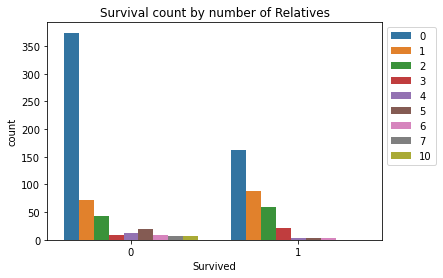

In [81]:
sns.countplot(train1.Survived, hue=train1.relatives)
plt.title('Survival count by number of Relatives')
plt.legend(bbox_to_anchor=(1, 1), loc=2) 